In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [96]:
### makeGenOfTypeDF -- Function that takes year, csv name, returns df of generators w/specific technology (tech_code)
### or energy source (energy_code)
### 
### Relevant tech_codes are: ST (Steam Turbine, including nuclear, geothermal and solar steam), 
###                          PV (Photovoltaic)
###                          WT (Wind Turbine) ## changes to WS for offshore in 2018
### 
### Relevant energy_codes are:  SUN (Solar -- Photovoltaic, Thermal)
###                             WAT (Water -- Conventional, Pumped Storage)
###                             WND (Wind)
### TO DO:      Make more general for any CSV of this format(feed in file name)

def makeGenOfTypeDF(year, tech_code="PV", energy_code = "SUN"):
    proposed_gen_df = pd.read_csv("../Data for Tax Equity Project/eia_data/eia860" + str(year) + 
                                  "/proposed_gen_" + str(year) + ".csv")
    proposed_gen_df.columns = map(str.lower, proposed_gen_df.columns)
    pmList = ['prime_mover', 'prime mover', 'primemover']
    enList = ['energy_source_1']
    for pm in pmList:
        if pm in proposed_gen_df.columns:
            tech_df = proposed_gen_df[proposed_gen_df[pm]==tech_code]
    for en in enList:
        if en in proposed_gen_df.columns:
            en_df = proposed_gen_df[proposed_gen_df[en]==energy_code]
            tech_df = tech_df.combine_first(en_df)
    return(tech_df)

In [97]:
for x in range(2008,2014):
    print(str(x) + ": " + str(makeGenOfTypeDF(x).shape[0]))

2008: 48
2009: 188
2010: 357
2011: 325
2012: 328
2013: 590


### Table to make: is average capacity addition by year

In [98]:
makeGenOfTypeDF(2012).iloc[:,1:5]

,utility id,utility name,plant code,plant name
8,803,Arizona Public Service Co,57997,Foothills Solar Plant
9,803,Arizona Public Service Co,57997,Foothills Solar Plant
10,803,Arizona Public Service Co,58383,Hyder II
50,5070,Delaware Electric Cooperative,58473,Bruce A Henry Solar Farm
118,11208,Los Angeles Department of Water & Power,57304,Southern Owens Valley Solar Ranch
...,...,...,...,...
886,58504,"North Carolina Solar II, LLC",58531,North Carolina Solar Bethea I
887,58504,"North Carolina Solar II, LLC",58532,North Carolina Solar Bethea II
888,58504,"North Carolina Solar II, LLC",58532,North Carolina Solar Bethea II
889,58509,"Affordable Solar Silver City, LLC",58540,Silver City WWTP PV Project


In [99]:
for x in range(2008,2014):
    print(str(x) + " : " + str(calc_mean_capacity(makeGenOfTypeDF(x)).describe()))

2008 : count      8.000000
mean     110.854353
std      193.199930
min        0.500000
25%        0.950000
50%       54.100000
75%       82.294122
max      575.000000
Name: nameplate, dtype: float64
2009 : count      8.000000
mean     110.864450
std      198.821504
min        0.500000
25%        0.500000
50%       16.106383
75%      114.652126
max      575.000000
Name: nameplate, dtype: float64
2010 : count      8.000000
mean     128.990596
std      212.874393
min        0.500000
25%        0.500000
50%       19.831513
75%      142.321305
max      563.000000
Name: nameplate, dtype: float64
2011 : count      8.000000
mean     113.286048
std      174.286100
min        0.400000
25%        1.025000
50%       27.225846
75%      137.302517
max      450.000000
Name: nameplate, dtype: float64
2012 : count      8.000000
mean     104.256347
std      162.609928
min        0.500000
25%        1.887500
50%       21.735976
75%      126.421617
max      400.000000
Name: nameplate capacity (mw), dtype:

In [60]:
def makeCapacitySeries(df):
    capVar = [i for i in df.columns if "nameplate" in i][0]
    capList = pd.to_numeric(df[capVar])
    return(capList)

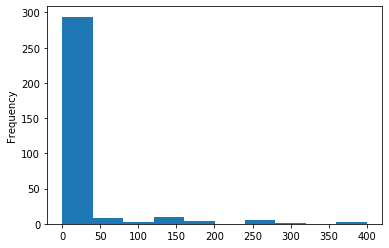

In [94]:
makeCapacitySeries(makeGenOfTypeDF(2012)).plot.hist()

In [118]:
grant_recipients = pd.read_excel("../Data for Tax Equity Project/treasury_data/grant_awards.xlsx", header=1)
solar_grants = grant_recipients[[("Solar" in str(i)) for i in grant_recipients['Technology']]]

In [124]:
solar_grants

,Business Name,State,Technology,Funded,Award Date
3,Alaska Airlines Inc.,AK,Solar Electricity,19238.0,2012-07-10 00:00:00
4,Ron Levy Photography,AK,Solar Electricity,4010.0,2012-04-11 00:00:00
10,Atlantic Windshield Repair Inc,AL,Solar Electricity,8270.0,2012-12-17 00:00:00
11,BBVA Compass,AL,Solar Electricity,24000.0,2011-10-12 00:00:00
12,Classic Car,AL,Solar Electricity,45058.0,2012-12-17 00:00:00
...,...,...,...,...,...
9991,Silverthorn Properties LLC,WI,Solar Thermal,4065.0,2010-10-22 00:00:00
9992,Traveling Hunter Investments LLC,WI,Solar Thermal,8294.0,2010-08-25 00:00:00
10004,"Sentry Security Systems, LLC",WV,Solar Electricity,480.0,2012-03-23 00:00:00
10005,"B. Taylor Triea, LLC",WV,Solar Thermal,4977.0,2012-05-16 00:00:00
